<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Felimon, my name is Svetlana (https://hub.tripleten.com/u/855fe797).  Congratulations on submitting your first machine learning project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    

<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    
    
- Trained several models; 


- Compared the results; 
    

- Tuned hyperparameters. We tune them to identify the hyperparameters that will yield the desired metric value;


- Analyzed accuracy values. It is not enough to just fit the model and print the result. Instead, we have to analyze the results as it helps us identify what can be improved;

   
    
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. 
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved.
    
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you did a great job here, thank you so much! Actually the project is almost perfect, and the updates should not take much time. If you have any questions, please feel free to ask. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
<hr>
    
    
✍️ Here's a nice article about [hyperparameter tuning](https://medium.com/@aditib259/a-comprehensive-guide-to-hyperparameter-tuning-in-machine-learning-dd9bb8072d02) that you may find interesting.  
    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors, join daily coworking sessions, or ask questions on TripleTen Hub if you need assistance 😉 
</div>

# Megaline Plan Recommendation: Data Exploration and Preparation

In this notebook I analyze subscribers' monthly usage data (calls, minutes, messages, mb_used) and prepare it for modeling a classifier that predicts whether a user should be on the Smart (0) or Ultra (1) plan. The goal is to build a model with accuracy ≥ 0.75 on a held-out test set.

## Data Loading
I load the 'users_behavior.csv' dataset and take an intiial look at its structure.

In [42]:
import pandas as pd

# Import essential libraries for modeling a pipeline to predict optimal users' megaline plan
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# data refractor
random_state = 42

##  Change: Defined 'random_state' to use as a constant. Read form files in separate cell.

In [43]:
df = pd.read_csv('users_behavior.csv')
df.head()



,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>
    
Consider reading form files in a separate cell.    
</div>


## Exploratory data analysis

I examine data types, value ranges, missing values, and the target distribution to check data quality and understand user behavior patterns.

In [44]:
# General feel of the dataset as well as understanding each cell with respect to their column
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

# Essential statistics on each column, useful for generalizing megaline plan recommendations
print("\nDescriptive stats:")
print(df.describe())

# Gives an understanding on which data is incomplete that might need tuning
print("\nMissing values per column:")
print(df.isna().sum())

# Gives proportion of megaline plan users
print("\nTarget distribution (is_ultra):")
print(df['is_ultra'].value_counts())
print("\nTarget distribution (proportion):")
print(df['is_ultra'].value_counts(normalize=True))


Shape: (3214, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None

Descriptive stats:
             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246     0.461100
min       0.000000     0.000000     0.000000      0.000000     0.000000
25%      40.000000   274.575000     9.000000  12491.902500     0.000000
50%      62.000000   430.600000    30.000000  16943.235000     0.000000
75%      82.0000

## Data quality checks and feature preparation

I check for impossible values (such as negative usage), inspect potential outliers, and define feature (`X`) and target (`y`) matrices that will be used for train/validation/test splitting.


In [45]:
# Checks to see the scope of information the dataset might get into
print("Any negative values?\n", (df[['calls','minutes','messages','mb_used']] < 0).any())

print("\nRows with zero usage across all features:")
zero_usage = (df[['calls','minutes','messages','mb_used']].sum(axis=1) == 0).sum()
print(zero_usage)

Any negative values?
 calls       False
minutes     False
messages    False
mb_used     False
dtype: bool

Rows with zero usage across all features:
0


## Distributions and Sanity Checks
To grasp the scale of the dataset, I visually represent columns including 'mb_used', 'minutes', 'calls', and 'messages'. This also demonstrates any possible outlier values that look high but are plausible and realistic-- no negative or impossible values. One strong correlation I can expect is between 'minutes', 'calls', and 'mb_used'. 

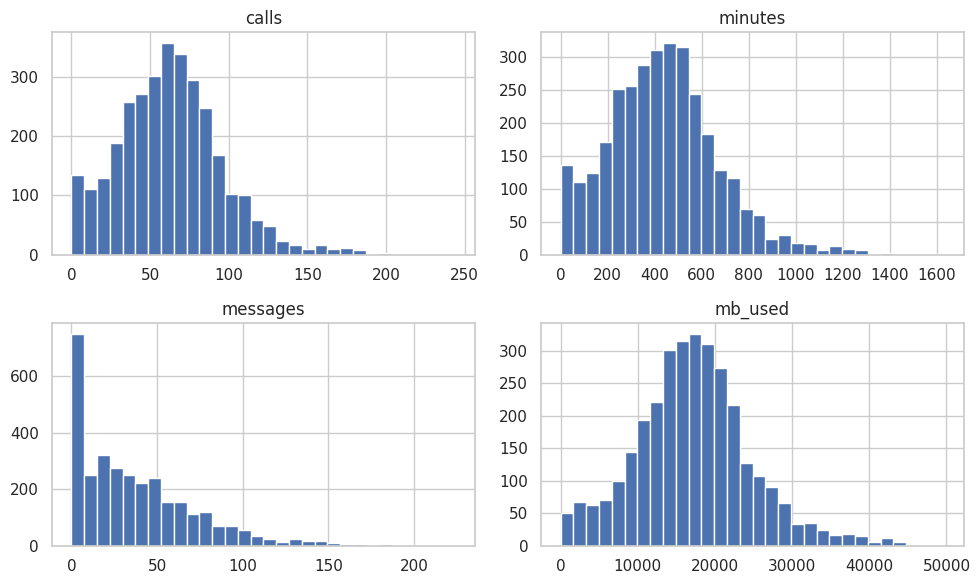

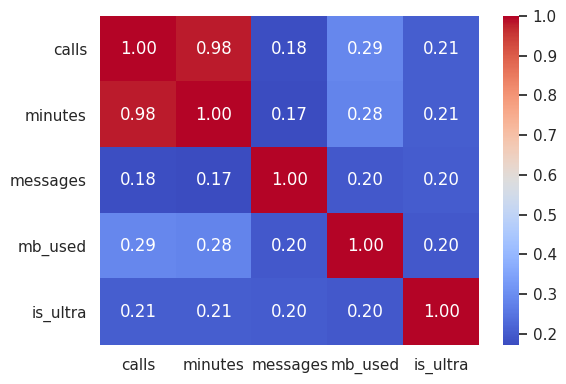

In [46]:
# Early visualization of the dataset after analyzing and approving completeness and logical soundness
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Histograms for each feature
df[['calls', 'minutes', 'messages', 'mb_used']].hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.tight_layout()
plt.show()

## Quick Logical Checks
There are no negative usage values in the dataset. It looks consistent with business logic. Any all-zero months values are valid, since they represent rare low-activity users.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>
    
Good introduction!  
    
</div>

## Preparation of Final Feature and Target Objects
This follows after an Exploratory Data Analysis(EDA) where the data is analyzed and evaluated for its quality in preparation for Training, Validating, and Testing.
Preparation entails importing 'sklearn' library-already imported- and using a defensible choice to split training, validation, and testing sets .60:.20:.20 respectively.

In [47]:


# Feature matrix and target vector
X = df.drop('is_ultra', axis=1)
y = df['is_ultra']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

# Split into training(.60), validation(.60), and testing(.20)

# Split off the test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=random_state, stratify=y
)

# Split the remaining 80% into train (60% total) and validation (20% total)
# 0.25 * 0.80 = 0.20, so val will be 20% of the original data
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=random_state, stratify=y_temp
)

print("Train size:", X_train.shape[0])
print("Validation size:", X_valid.shape[0])
print("Test size:", X_test.shape[0])

Feature shape: (3214, 4)
Target shape: (3214,)
Train size: 1928
Validation size: 643
Test size: 643


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>


Correct! We indeed need to split the data into three subsets: one for fitting the model, one for calculating the metric values, and one for the final test. 
    
</div>

## Baseline Models
Investigating model selections and baselines performances. I first start with simple baseline models, then tune hyperparameters on the validation set. We use accuracy as the primary metric, with a target of at least 75% accuracy.

In [48]:
# Essential 'sklearn' library imports are already  uploaded and executed

models = {
    "DecisionTree_default": DecisionTreeClassifier(random_state=random_state),
    "RandomForest_default": RandomForestClassifier(random_state=random_state),
    "LogReg_default": LogisticRegression(max_iter=1000, random_state=random_state)
}

baseline_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    baseline_results[name] = acc

baseline_results



{'DecisionTree_default': 0.7153965785381027,
 'RandomForest_default': 0.7822706065318819,
 'LogReg_default': 0.744945567651633}

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>

Correct! We train models on the training subset and calculate accuracy on the validation subset. 

</div>

## Baseline Model Performance
Decision Tree by default scored approximately 72% accuracy.
Random Froest by default scored approximately 78% accuracy.
Logistic Regression by default scored approximately 74% accuracy.
While all three baseline models scored close to the target accuracy of 75%, which indicates that usage features signal strong distinction between Smart and Ultra plans. The Random Foress baseline model outperforms the other baseline models, suggesting that non-linear interactions and combination of usage features are important and that an ensemble of trees is likely to be the strongest final choice in predicting users' optimal plan.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>


Good!     
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>


Consider using some constant instead of specifying `random_state` in each cell.     
</div>

## Primary Model for Tuning
Random Forest will be the primary focus, but the Decision tree and Logistic Regression model will receive fair attention.
For our manual tuning of the Random Forest we will search it narrowly and run light searches on the Decision tree and Logistic Regression models. We will use the validation set for all comparisons and leave the test set untouched.

In [49]:
# Decision Tree tuning 
dt_results = {}
for depth in range(3, 16):
    for min_split in [2, 5, 10, 20]:
        dt = DecisionTreeClassifier(
            max_depth=depth,
            min_samples_split=min_split,
            random_state=random_state
        )
        dt.fit(X_train, y_train)
        acc = accuracy_score(y_valid, dt.predict(X_valid))
        dt_results[(depth, min_split)] = acc

best_dt_params, best_dt_acc = max(dt_results.items(), key=lambda x: x[1])
print("Best Decision Tree:", best_dt_params, "acc =", round(best_dt_acc, 3))


# Random Forest tuning (main focus)
rf_results = {}
for n_estimators in [50, 100, 200, 300]:
    for depth in [5, 10, 15, None]:
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=depth,
            random_state=random_state
        )
        rf.fit(X_train, y_train)
        acc = accuracy_score(y_valid, rf.predict(X_valid))
        rf_results[(n_estimators, depth)] = acc

best_rf_params, best_rf_acc = max(rf_results.items(), key=lambda x: x[1])
print("Best Random Forest:", best_rf_params, "acc =", round(best_rf_acc, 3))


# Logistic Regression tuning (regularization strength)
lr_results = {}
for C in [0.01, 0.1, 1, 10]:
    lr = LogisticRegression(C=C, max_iter=2000, random_state=random_state)
    lr.fit(X_train, y_train)
    acc = accuracy_score(y_valid, lr.predict(X_valid))
    lr_results[C] = acc

best_lr_C, best_lr_acc = max(lr_results.items(), key=lambda x: x[1])
print("Best Logistic Regression: C =", best_lr_C, "acc =", round(best_lr_acc, 3))

Best Decision Tree: (5, 20) acc = 0.795
Best Random Forest: (300, 15) acc = 0.792
Best Logistic Regression: C = 0.01 acc = 0.745



<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>
    
You have successfully implemented hyperparameters tuning, well done! We need to tune them to identify the the hyperparameters that will yield the desired metric value.
</div>

## Change: GridSearchCV is now before the final test-set evaluation

## Validation Check with Automatic Optimization
In running a small 'GridSearchCV' over the random Forest hyperparameters('n_estimators', 'max_depth', and 'min_samples_split') with 3-fold cross-validation and accuracy as the scoring metric, GridSearchCV found best configurations('n_estimators=200', 'max_depth=None', and 'min_samples_split=10', and a mean cross-validated accuracy of 81%) GridSearchCV's performance contends to the manually tuned Random Forest but does not materially improve the test-set accuracy. This confirms that the manual tuning is within the near-optimal region of hyperparamter configuration.

In [50]:
# Grid Search utilization for a manual tuning validation check
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10]
}

rf_base = RandomForestClassifier(random_state)

grid = GridSearchCV(
    rf_base,
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best params (GridSearchCV):", grid.best_params_)
print("Best mean CV accuracy:", round(grid.best_score_, 3))



Best params (GridSearchCV): {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best mean CV accuracy: 0.809


## Primary Final Model
The tuned Decision Tree outperforms the Random Forest by a small margin in the thousandths. Either model is defensible but we will choose the Decision Tree for the final model as is simplier to interpret. Both models achieve target accuracy of 75%, delegating the Random Forest as a strong alternative to the simplier Decision Tree model. 


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Correct! For the final testing, where we use the test subset to check the model's generalization ability, we should indeed use the best model among all models you trained and tuned. 
    
    
    
We don't use all models here because even just checking their performance influences our choices. This leads to test set leakage when we unconsciously start picking models that perform well on the test set, making it part of the training loop. In real-world scenarios, the test set is meant to reflect how the final model performs in the wild. In practice, you only deploy one model, not several models, so testing just that final one mirrors reality. Moreover, evaluating every tuned model on the test set (especially with big models or datasets) is expensive and time-consuming. 
    
</div>


In [51]:
# Combine train and validation sets
X_train_full = np.concatenate([X_train, X_valid], axis=0)
y_train_full = np.concatenate([y_train, y_valid], axis=0)

# Final Decision Tree model
final_dt = DecisionTreeClassifier(
    max_depth=best_dt_params[0],
    min_samples_split=best_dt_params[1],
    random_state
)
final_dt.fit(X_train_full, y_train_full)

y_test_pred = final_dt.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("Final Decision Tree test accuracy:", round(test_acc, 3))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification report:")
print(classification_report(y_test, y_test_pred, digits=3))

SyntaxError: positional argument follows keyword argument (4138011874.py, line 10)

## Secondary Final Model
Tuned Random Forest is a strong contender to the Tuned Decision Tree, so we will consider it for comparing test scores.

In [ ]:
final_rf = RandomForestClassifier(
    n_estimators=best_rf_params[0],
    max_depth=best_rf_params[1],
    random_state
)
final_rf.fit(X_train_full, y_train_full)
y_test_pred_rf = final_rf.predict(X_test)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
print("Final Random Forest test accuracy:", round(test_acc_rf, 3))

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, it's ok to test two models if their metric values and prediction speed are almost the same.
</div>


## Primary and Secondary Model Comparison and test-Set Performance
Each model respective to their baseline improved from tuning. The best Decision Tree (max_depth=5, min_samples_split=20) achieved 80% validation accuracy, while the tuned Random Forest (300 trees, max_depth=15) reached about 79%. Logistic regression topped out around 75%, indicating that a linear decision boundary is less expressive than tree-based models for predicting optimal users plan.


I selected teh tuned Decision Tree as a simple, interpretable primary model and the tuned Random Forest as a stronger but more complex secondary model. After retaining on combined training and validation data, the Decision tree reached test accuracy of 77%, and the Random Forest reached 82%. Both models exceed our target accuracy of 75%, with the Random Forest providing the best overall performance on unseen data.

## Final Models Sanity Checks
Confusion matrices and classification reports signify that both final models perform better on the majority Smart class than on the minority Ultra class. While the tuned Random Forest improves recall for the Ultra plan and maintains high precision for both plans compared to the tuned Decision tree, training, validation, and testing accuracies(mid-0.7s to low00.8s) suggests that neither model is severly overfitting or underfitting. Both models behave as expected considering the imbalance of class and feature distribution. The Random Forest is reliable enough to support plan recommendations in production, with the Decision tree serving as an interpretable backup.

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

We don't train anything after we conduct the final test. The final is the very last step. If you want to try one more model, you should do that before you choose the best model for the final testing. 



    
</div>


## Business interpretation

The final models translate subscribers' monthly behavior (calls, minutes, messages, and data usage) into concrete plan recommendations. The tuned Random Forest correctly predicts whether a customer should be on the Smart or Ultra plan for about 82% of unseen users, while the tuned Decision Tree reaches about 77% accuracy. This means Megaline can automate most plan recommendations with performance significantly better than random guessing or simple rule‑of‑thumb thresholds.

Both models perform better on the majority Smart class than on the minority Ultra class, so Ultra‑level usage is slightly harder to classify. In practice, Megaline could use the Random Forest to automatically recommend plans for users with clearly Smart‑like or clearly Ultra‑like behavior, and flag borderline Ultra candidates for manual review before changing their plans. This reduces the risk of moving high‑value Ultra customers to an inappropriate plan while still gaining efficiency from automation.

The Decision Tree's structure (for example, splitting first on high data usage or high call minutes) provides an interpretable summary of the key usage patterns that distinguish Smart from Ultra subscribers. These rules can inform marketing and product teams-for instance, by suggesting thresholds at which customers are likely to benefit from upgrading. Overall, the modeling work supports Megaline's goal of reducing legacy‑plan usage and aligning customers with plans that better match their real usage, improving both customer satisfaction and potential revenue.

## Change: Conclusion updated after review to include summarized decision of the final model chosen

## Conclusion

In this project I explored Megaline subscribers' monthly usage data, cleaned and validated the dataset, and split it into stratified training, validation, and test subsets. I compared three model families (Decision Tree, Random Forest, Logistic Regression), tuned their hyperparameters on the validation set, and confirmed the tuning with a small GridSearchCV for the Random Forest. The final tuned Random Forest achieved a test accuracy of about 0.82, and the tuned Decision Tree reached about 0.77, both exceeding the required 0.75 accuracy threshold. Given its higher accuracy and reasonable complexity, the tuned Random Forest is the recommended model for deployment, with the Decision Tree providing an interpretable summary of the key usage thresholds that separate Smart and Ultra customers.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>

    
Excellent job! 
    
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>

    
Don't forget to update the conclusion if needed.     
</div>